In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [54]:
df = pd.read_csv("Casedata.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


In [32]:
print("\n--- Missing Values ---")
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df.isnull().sum())


--- Missing Values ---
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                  22
NAME_TYPE_SUITE                  81
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                6290
CNT_FAM_MEMBERS                   0
REGI

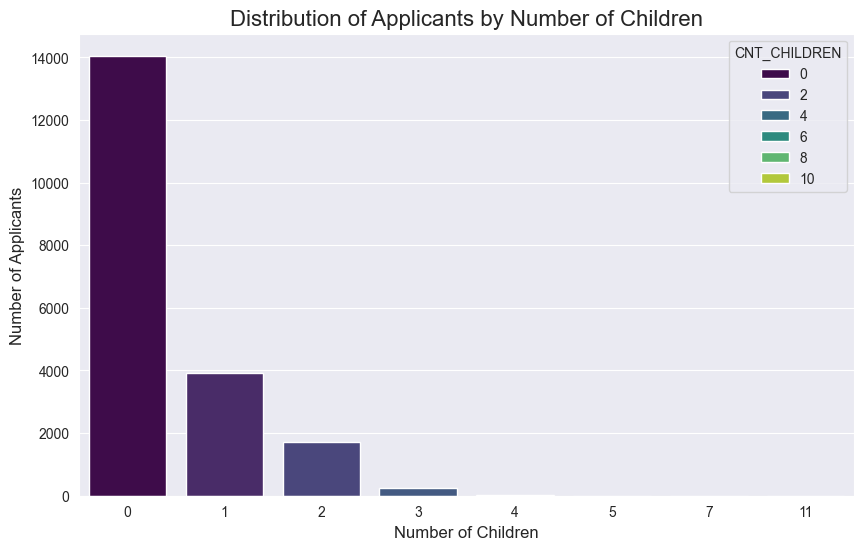

In [19]:
df['CNT_CHILDREN'] = pd.to_numeric(df['CNT_CHILDREN'])

# --- Plotting ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette='viridis', hue='CNT_CHILDREN', x='CNT_CHILDREN')
plt.title('Distribution of Applicants by Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.show()



C:\Users\miyee\AppData\Local\Temp\ipykernel_24000\2094365163.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


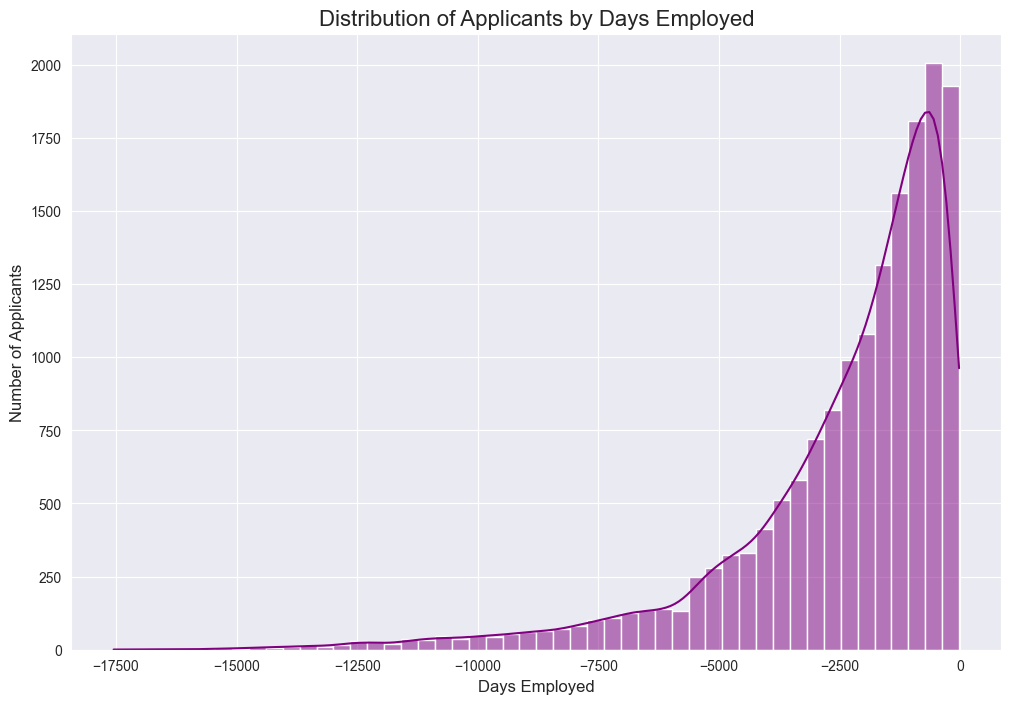

In [26]:
#distribution of days employed
df.replace(['XNA', 'NA'], np.nan, inplace=True)

# The 'DAYS_EMPLOYED' column has a known placeholder value (365243)
# for unemployed/retired individuals. We'll replace it with NaN.
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# --- Plotting ---
plt.figure(figsize=(12, 8))
sns.histplot(df['DAYS_EMPLOYED'], bins=50, kde=True, color='purple')
plt.title('Distribution of Applicants by Days Employed', fontsize=16)
plt.xlabel('Days Employed', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.show()

C:\Users\miyee\AppData\Local\Temp\ipykernel_24000\798804675.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EXT_SOURCE_2'].replace('NA', np.nan, inplace=True)


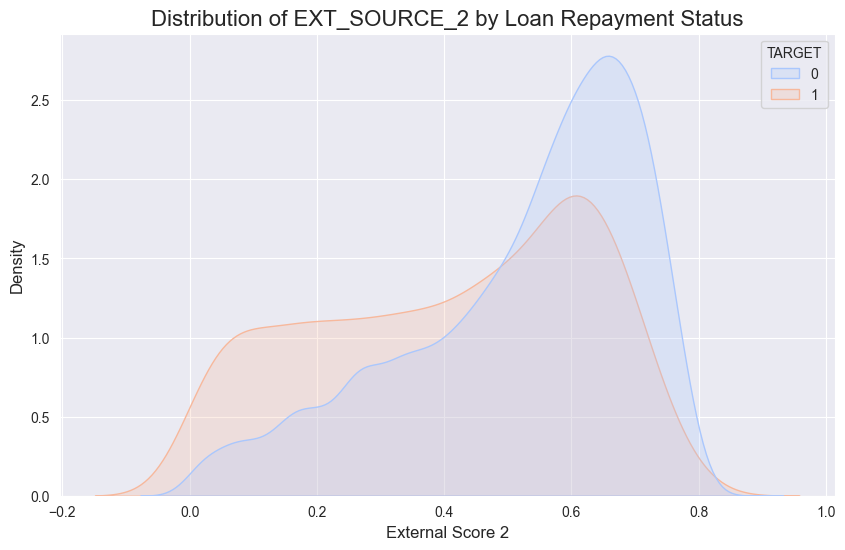

In [13]:

# --- Data Cleaning ---
# Replace 'NA' string in EXT_SOURCE_2 with numpy.nan
df['EXT_SOURCE_2'].replace('NA', np.nan, inplace=True)
df.dropna(subset=['EXT_SOURCE_2'], inplace=True)
df['EXT_SOURCE_2'] = pd.to_numeric(df['EXT_SOURCE_2'])

# --- Plotting ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='EXT_SOURCE_2', hue='TARGET', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distribution of EXT_SOURCE_2 by Loan Repayment Status', fontsize=16)
plt.xlabel('External Score 2', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


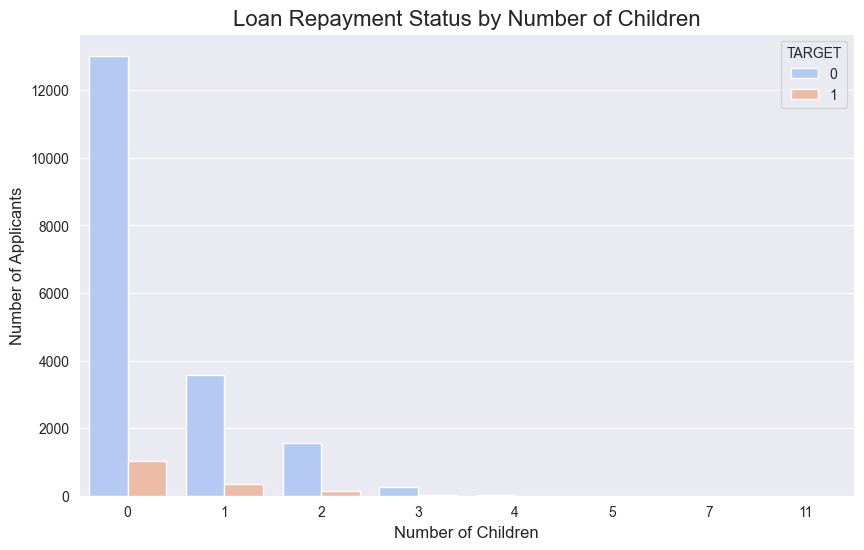

In [27]:
'''''''''
# --- Data Cleaning ---
# Replace 'XNA' and 'NA' with NaN for consistency
df.replace(['XNA', 'NA'], np.nan, inplace=True)

# Drop any rows where 'CNT_CHILDREN' is missing for this plot
df.dropna(subset=['CNT_CHILDREN'], inplace=True)
df['CNT_CHILDREN'] = pd.to_numeric(df['CNT_CHILDREN'])
'''''
# --- Plotting ---
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=df, palette='coolwarm')
plt.title('Loan Repayment Status by Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.show()


In [28]:
df = pd.read_csv("Casedata.csv")
# --- 3. Handle Missing Values (NULL/NA) ---
# We identified that missing values are represented as 'XNA' and 'NA'.
# We will replace these with np.nan for consistent handling.
#print("\n--- Handling Missing Values ---")
#df.replace(['XNA', 'NA'], np.nan, inplace=True)

# Now, let's check the number of missing values again.
missing_summary = df.isnull().sum()
print("Missing values after converting placeholders:")
print(missing_summary[missing_summary > 0]) # Print only columns with missing values

# =========================================================================
# --- 4. Handle Outlier and Inconsistency in 'DAYS_EMPLOYED' ---
# The value 365243 is a known outlier representing unemployed/retired individuals.
print("\n--- Handling Outlier in 'DAYS_EMPLOYED' ---")

# First, let's get a count of the outlier value before replacing it.
outlier_count = (df['DAYS_EMPLOYED'] == 365243).sum()
print(f"Count of the DAYS_EMPLOYED outlier value (365243): {outlier_count}")

# We will create a new binary feature to explicitly capture this information.
# This is a key feature engineering step.
#df['IS_UNEMPLOYED_OR_RETIRED'] = (df['DAYS_EMPLOYED'] == 365243).astype(int)

# Now, we replace the outlier value with NaN so it doesn't skew our numerical analysis.
#df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
#print("DAYS_EMPLOYED outlier replaced with NaN and new feature created.")

# =========================================================================


Missing values after converting placeholders:
AMT_ANNUITY                      2
AMT_GOODS_PRICE                 22
NAME_TYPE_SUITE                 81
OCCUPATION_TYPE               6290
EXT_SOURCE_2                    43
EXT_SOURCE_3                  3945
OBS_30_CNT_SOCIAL_CIRCLE        54
DEF_30_CNT_SOCIAL_CIRCLE        54
OBS_60_CNT_SOCIAL_CIRCLE        54
DEF_60_CNT_SOCIAL_CIRCLE        54
AMT_REQ_CREDIT_BUREAU_HOUR    2701
AMT_REQ_CREDIT_BUREAU_DAY     2701
AMT_REQ_CREDIT_BUREAU_WEEK    2701
AMT_REQ_CREDIT_BUREAU_MON     2701
AMT_REQ_CREDIT_BUREAU_QRT     2701
AMT_REQ_CREDIT_BUREAU_YEAR    2701
dtype: int64

--- Handling Outlier in 'DAYS_EMPLOYED' ---
Count of the DAYS_EMPLOYED outlier value (365243): 3599


In [29]:
# Now, let's check the number of missing values again.
missing_summary = df.isnull().sum()
print("Missing values after converting placeholders:")
# This line prints only the columns that have a non-zero count of missing values
print(missing_summary[missing_summary > 0])

Missing values after converting placeholders:
AMT_ANNUITY                      2
AMT_GOODS_PRICE                 22
NAME_TYPE_SUITE                 81
OCCUPATION_TYPE               6290
EXT_SOURCE_2                    43
EXT_SOURCE_3                  3945
OBS_30_CNT_SOCIAL_CIRCLE        54
DEF_30_CNT_SOCIAL_CIRCLE        54
OBS_60_CNT_SOCIAL_CIRCLE        54
DEF_60_CNT_SOCIAL_CIRCLE        54
AMT_REQ_CREDIT_BUREAU_HOUR    2701
AMT_REQ_CREDIT_BUREAU_DAY     2701
AMT_REQ_CREDIT_BUREAU_WEEK    2701
AMT_REQ_CREDIT_BUREAU_MON     2701
AMT_REQ_CREDIT_BUREAU_QRT     2701
AMT_REQ_CREDIT_BUREAU_YEAR    2701
dtype: int64


In [34]:
amt_req_cols = [col for col in df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
amt_req_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [37]:
# Replacing missing values with 0
for col in amt_req_cols:
    df[col].fillna(0, inplace=True)

print(df[amt_req_cols].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


C:\Users\miyee\AppData\Local\Temp\ipykernel_24000\3434735361.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [39]:
#Create a new feature that encompasses the 6 amt_req variables
# We will sum them up to get a total number of inquiries.
df['TOTAL_AMT_REQ'] = df[amt_req_cols].sum(axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_AMT_REQ
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0,7.0


In [41]:
#dropping the flag_documents column
flagdocs = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df=df.drop(flagdocs, axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_AMT_REQ
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0.0,0.0,-4,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0.0,0.0,-925,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0.0,0.0,-3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,...,2.0,0.0,-397,0.0,0.0,0.0,0.0,2.0,5.0,7.0


In [46]:
#drop the organization type column
df=df.drop(['ORGANIZATION_TYPE'], axis=1)

In [49]:
#converting the integer columns to objects
df[['FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_WORK_PHONE']] = \
df[['FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_WORK_PHONE']].astype(str)

In [43]:
#data types
df.dtypes


TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE          

--- Analyzing Column Distributions ---

--- FLAG_EMAIL ---
FLAG_EMAIL
0    94.26
1     5.74
Name: proportion, dtype: float64


--- FLAG_OWN_CAR ---
FLAG_OWN_CAR
N    66.065
Y    33.935
Name: proportion, dtype: float64


--- FLAG_OWN_REALTY ---
FLAG_OWN_REALTY
Y    69.865
N    30.135
Name: proportion, dtype: float64


--- FLAG_EMP_PHONE ---
FLAG_EMP_PHONE
1    82.005
0    17.995
Name: proportion, dtype: float64


--- FLAG_PHONE ---
FLAG_PHONE
0    72.335
1    27.665
Name: proportion, dtype: float64


--- FLAG_WORK_PHONE ---
FLAG_WORK_PHONE
0    79.865
1    20.135
Name: proportion, dtype: float64


--- FLAG_CONT_MOBILE ---
FLAG_CONT_MOBILE
1    99.815
0     0.185
Name: proportion, dtype: float64


--- FLAG_DOCUMENT_2 ---
FLAG_DOCUMENT_2
0    99.995
1     0.005
Name: proportion, dtype: float64


--- FLAG_DOCUMENT_3 ---
FLAG_DOCUMENT_3
1    71.12
0    28.88
Name: proportion, dtype: float64


--- FLAG_DOCUMENT_5 ---
FLAG_DOCUMENT_5
0    98.53
1     1.47
Name: proportion, dtype: float64


--

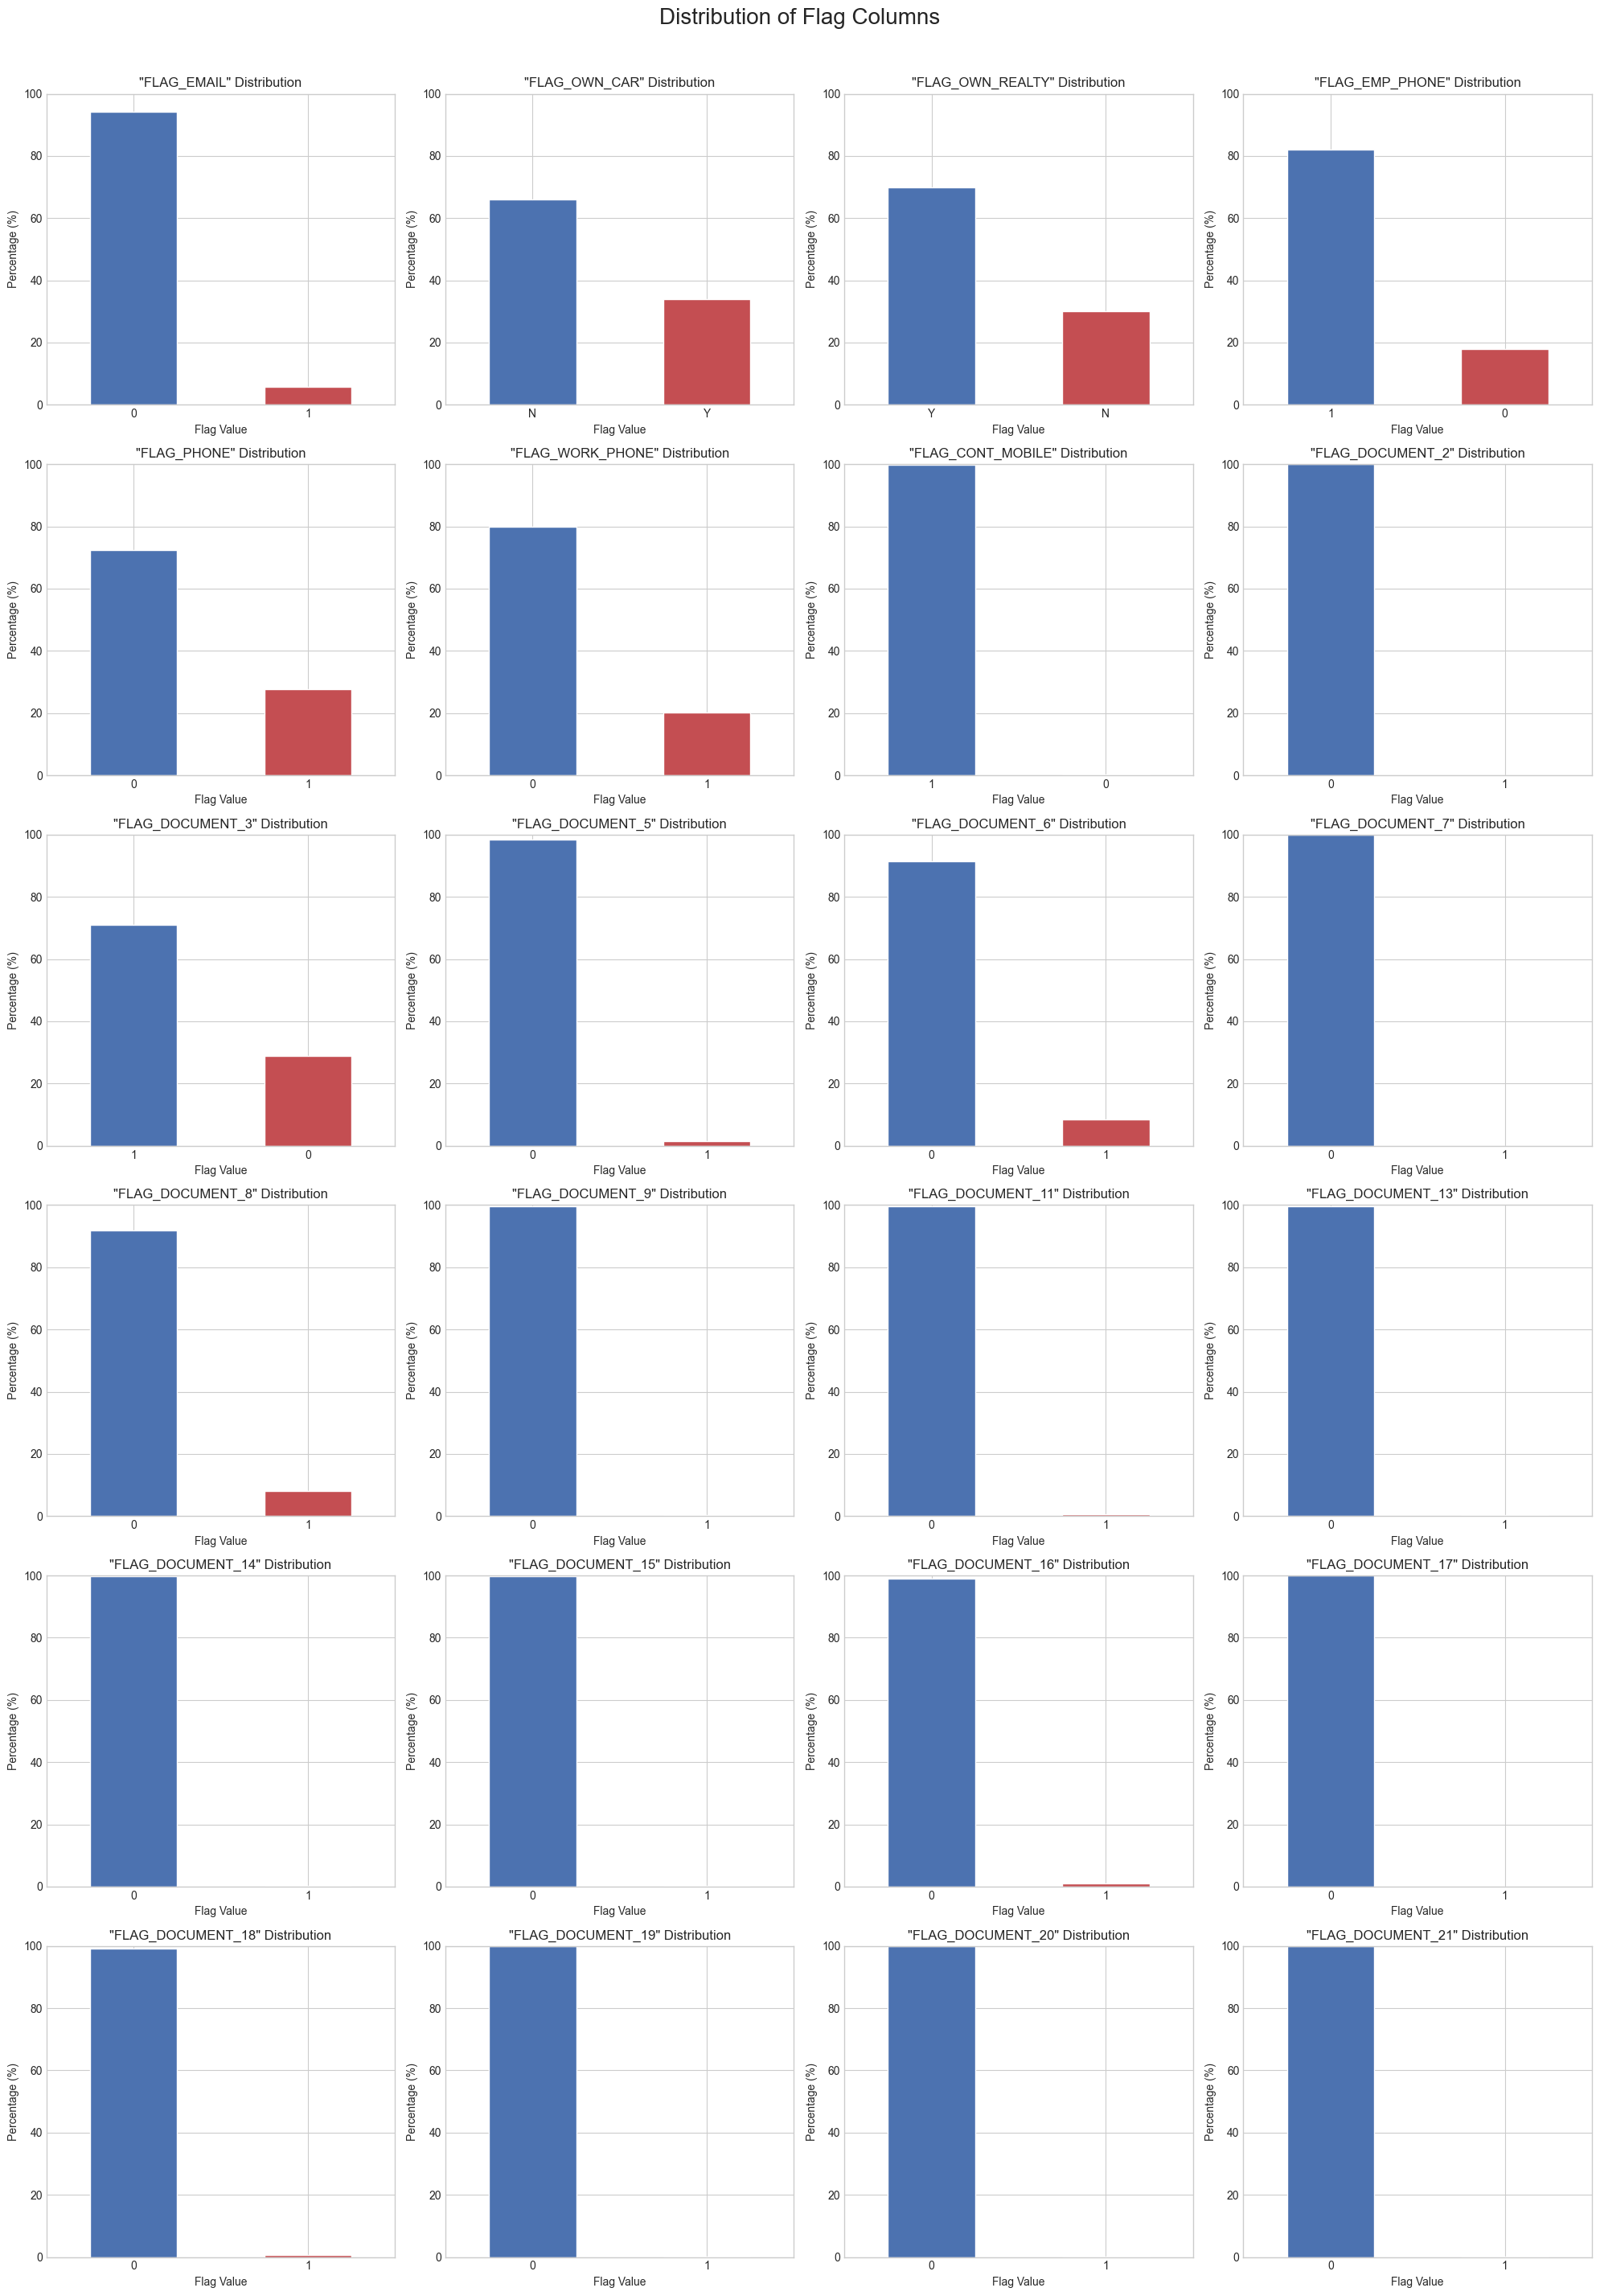

In [55]:
# Checking distribution of the flag columns
columns_to_check = [
    'FLAG_EMAIL',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'FLAG_EMP_PHONE',
    'FLAG_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21'
]

print("--- Analyzing Column Distributions ---\n")

# --- Plotting Setup ---
# Arrange plots in a grid to keep them readable
n_cols = 4
# Calculate the number of rows needed to fit all plots
n_rows = (len(columns_to_check) + n_cols - 1) // n_cols

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Distribution of Flag Columns', fontsize=20)

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

for i, col_name in enumerate(columns_to_check):
    # Skip if column is not in the dataframe
    if col_name not in df.columns:
        print(f"--- Warning: Column '{col_name}' not found in DataFrame. Skipping. ---\n")
        continue

    # Calculate the percentage distribution
    distribution = df[col_name].value_counts(normalize=True) * 100

    print(f"--- {col_name} ---")
    print(distribution)
    print("\n")

    # Create the bar plot on the correct subplot
    ax = axes[i]
    distribution.plot(kind='bar', ax=ax, color=['#4C72B0', '#C44E52'])

    ax.set_title(f'"{col_name}" Distribution')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Flag Value')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylim(0, 100) # Set y-axis to be from 0 to 100%

# Hide any unused subplots if the number of plots is not a perfect multiple of n_cols
for j in range(len(columns_to_check), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to make room for suptitle
plt.show()

In [ ]:
#onehot encoding for the categorical
X = pd.get_dummies(df.drop(columns=["Target"]), drop_first=True)
Y = df["Target"]

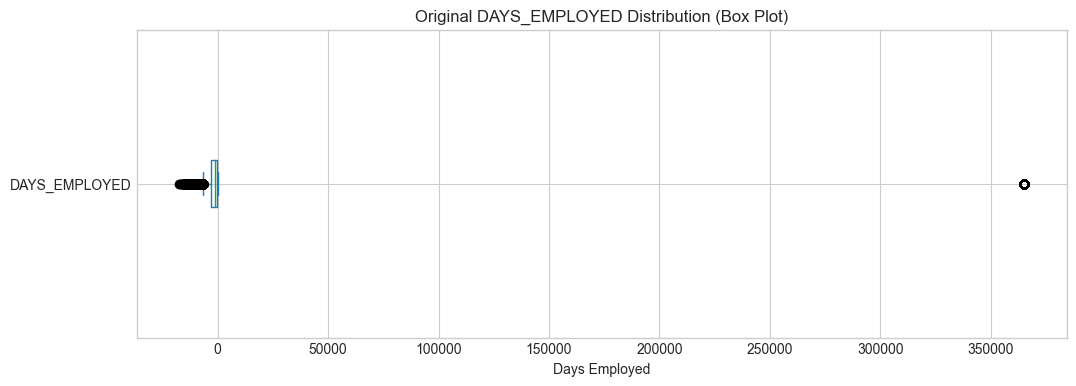

In [57]:
#visualizing the outlier
df['DAYS_EMPLOYED'].plot.box(vert=False, figsize=(12, 4))
plt.title('Original DAYS_EMPLOYED Distribution (Box Plot)')
plt.xlabel('Days Employed')
plt.show()


Identified anomalous value: 365243

Value counts for the new 'DAYS_EMPLOYED_ANOMALY' flag:
DAYS_EMPLOYED_ANOMALY
False    16401
True      3599
Name: count, dtype: int64

Replaced anomalous values with NaN.

--- Distribution of DAYS_EMPLOYED After Cleaning ---


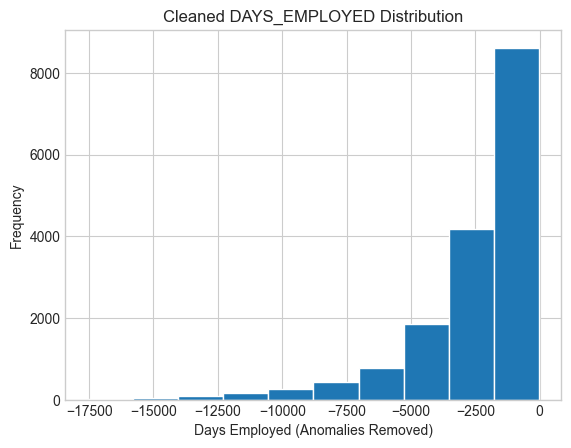

In [59]:
# Find the anomalous value (it's 365243 in this dataset)
anomaly_value = df['DAYS_EMPLOYED'].max()
print(f"\nIdentified anomalous value: {anomaly_value}")
# Create a new binary flag column for the anomaly.
# This captures the important information that these applicants are in a special category (e.g., pensioners).
df['DAYS_EMPLOYED_ANOMALY'] = df['DAYS_EMPLOYED'] == anomaly_value
print("\nValue counts for the new 'DAYS_EMPLOYED_ANOMALY' flag:")
print(df['DAYS_EMPLOYED_ANOMALY'].value_counts())

# Replace the anomalous values in the original column with NaN (Not a Number)
# This allows us to work with the distribution of the legitimate values.
df['DAYS_EMPLOYED'].replace({anomaly_value: np.nan}, inplace=True)
print("\nReplaced anomalous values with NaN.")


# --- 3. Visualize the Cleaned Data ---
print("\n--- Distribution of DAYS_EMPLOYED After Cleaning ---")
# Now the histogram will show the distribution of the legitimate, non-anomalous values.
# These are negative numbers, representing days worked before the application date.
df['DAYS_EMPLOYED'].plot.hist(title='Cleaned DAYS_EMPLOYED Distribution')
plt.xlabel('Days Employed (Anomalies Removed)')
plt.show()

In [60]:
df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOMALY
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,False
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0,False


In [ ]:
#converting the integer columns to objects
df[['FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_WORK_PHONE']] = \
df[['FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_PHONE', 'FLAG_WORK_PHONE']].astype(str)

In [ ]:
df=df.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'], axis=1)

In [ ]:
social_circle_cols = ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for col in social_circle_cols:
    if col in df.columns:
        median_val = df[col].median()
        print(f"\nMedian for {col}: {median_val}")
        print(f"Missing values in {col} before imputation: {df[col].isnull().sum()}")
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in {col} after imputation: {df[col].isnull().sum()}")
    else:
        print(f"\nColumn {col} not found in the dataframe.")

In [ ]:
#onehot encoding for the categorical
X = pd.get_dummies(df.drop(columns=['TARGET']), drop_first=True)
Y = df['TARGET']